In [108]:
# Data Handling and Analysis
import pandas as pd
import numpy as np

# Data Splitting
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Saving Results
import json

# Confusuon matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
nba_data = pd.read_csv(r"C:\Users\aaron\OneDrive - National College of Ireland\Year 3\Artificial Intelligence and Machine Learning\CA1\data\NBA_all_seasons_cleaned.csv")

# Check the first few rows
print(nba_data.head())


        player_name team_abbreviation   age  player_height  player_weight  \
0  Randy Livingston               HOU  22.0         193.04      94.800728   
1  Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2      George Lynch               VAN  26.0         203.20     103.418976   
3    George McCloud               LAL  30.0         203.20     102.058200   
4      George Zidek               DEN  23.0         213.36     119.748288   

                 college country draft_year draft_round draft_number  ...  \
0        Louisiana State     USA       1996           2           42  ...   
1  Northwestern Oklahoma     USA       1994           2           34  ...   
2         North Carolina     USA       1993           1           12  ...   
3          Florida State     USA       1989           1            7  ...   
4                   UCLA     USA       1995           1           22  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pc

In [110]:
# Define the threshold logic
threshold = 20  # Total of pts, reb, and ast to classify as an All-Star
nba_data['is_all_star'] = ((nba_data['pts'] + nba_data['reb'] + nba_data['ast']) > threshold).astype(int)

# Verify the target column
print(nba_data[['pts', 'reb', 'ast', 'is_all_star']].head())



    pts  reb  ast  is_all_star
0   3.9  1.5  2.4            0
1   3.8  1.3  0.3            0
2   8.3  6.4  1.9            0
3  10.2  2.8  1.7            0
4   2.8  1.7  0.3            0


is_all_star
0    10007
1     2837
Name: count, dtype: int64


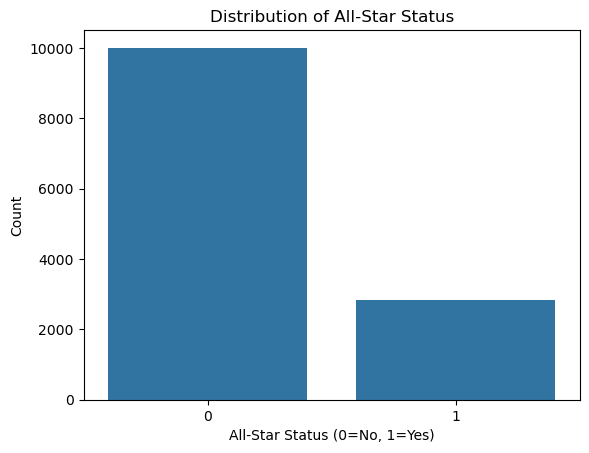

In [111]:
# Check the class distribution
print(nba_data['is_all_star'].value_counts())

sns.countplot(x='is_all_star', data=nba_data)
plt.title('Distribution of All-Star Status')
plt.xlabel('All-Star Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


In [112]:
# Features and target
X = nba_data[['age','pts', 'reb', 'ast']]
y = nba_data['is_all_star']

# Fill or drop missing values (fill with the mean)
X = X.fillna(X.mean())


In [113]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (10275, 4)
Testing set size: (2569, 4)


In [114]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9980537173997664

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1994
           1       1.00      0.99      1.00       575

    accuracy                           1.00      2569
   macro avg       1.00      1.00      1.00      2569
weighted avg       1.00      1.00      1.00      2569



In [115]:
# Initialize and train k-NN 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


k-NN Accuracy: 0.989100817438692

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1994
           1       0.98      0.97      0.98       575

    accuracy                           0.99      2569
   macro avg       0.99      0.98      0.98      2569
weighted avg       0.99      0.99      0.99      2569



In [116]:
# Create a dictionary of metrics
metrics = {
    "Logistic Regression": classification_report(y_test, y_pred_log, output_dict=True),
    "k-NN": classification_report(y_test, y_pred_knn, output_dict=True),
}

# Save to JSON
with open(r"C:\Users\aaron\OneDrive - National College of Ireland\Year 3\Artificial Intelligence and Machine Learning\CA1\results\results_classification.json", "w") as f:
    json.dump(metrics, f)


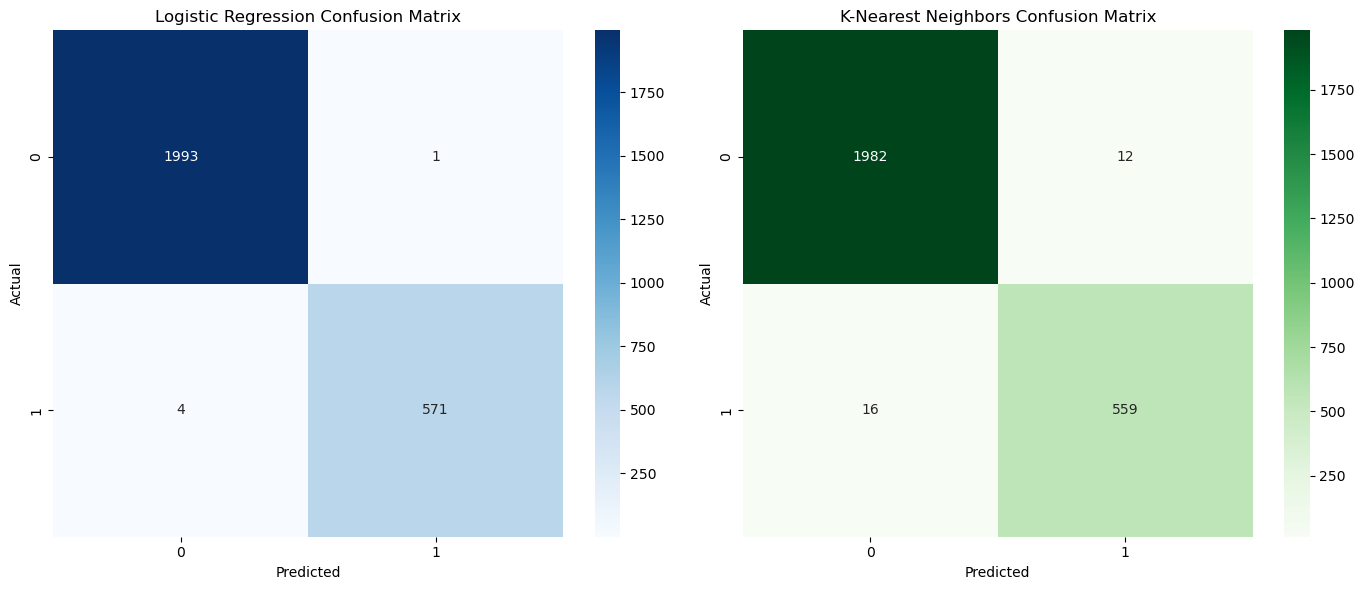

In [117]:
#  Plot the Confusion Matrices
plt.figure(figsize=(14, 6))

# Plotting the Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the K-Nearest Neighbors Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


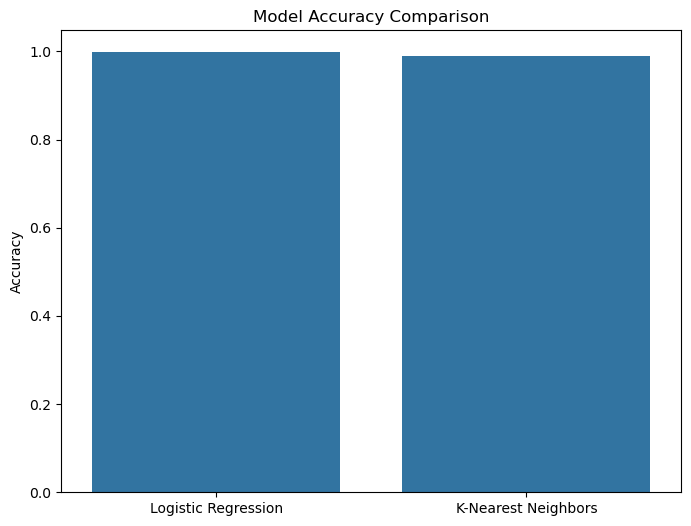

In [118]:
#Calculate accuracy for both models
logreg_pred = logreg_model.predict(X_test)  # Predictions for Logistic Regression
knn_pred = knn_model.predict(X_test)  # Predictions for K-Nearest Neighbors

# Calculate accuracy for Logistic Regression
logreg_acc = accuracy_score(y_test, logreg_pred)

# Calculate accuracy for K-Nearest Neighbors
knn_acc = accuracy_score(y_test, knn_pred)

#Accuracy Comparison Visualization
models = ['Logistic Regression', 'K-Nearest Neighbors']
accuracies = [logreg_acc, knn_acc]

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
